<a href="https://colab.research.google.com/github/kilos11/Michigan-State-university-Natural-Language-Processing-/blob/main/Chapter_3_Foundational_Components_of_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Perceptron: The Simplest Neural Network

The simplest neural network unit is a perceptron. The perceptron was historically and very loosely modeled after the biological neuron. As with a biological neuron, there is input and output, and “signals” flow from the inputs to the outputs, as illustrated in  igure 3­1.

Example 3­1. Implementing a perceptron using PyTorch

In [ ]:
import torch
import torch.nn as nn

class Perceptron(nn.Module):
    """ A perceptron is one linear layer """
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)
        """Args:
                input_dim (int): size of the input features"""

    def forward(self, x_in):
        """The forward pass of the perceptron                  Args:
                    x_in (torch.Tensor): an input data tensor                  x_in.shape should be (batch, num_features)         Returns:
                                the resulting tensor. tensor.shape should be (batch,).
        return torch.sigmoid(self.fc1(x_in)).squeeze()
                                       """
        return torch.sigmoid(self.fc1(x_in)).squeeze()

#Activation Functions

 Activation functions are nonlinearities introduced in a neural network to capture complex relationships in data. In  Diving Deep into Supervised Training” and  The Multilayer Perceptron” we dive deeper into why nonlinearities are required in the learning, but first, let’s look at a few commonly used activation functions.

##Sigmoid

 The sigmoid is one of the earliest used activation functions in neural network history. It takes any real value and squashes it into the range between 0 and 1. As you can observe from the plot, the sigmoid function saturates (i.e., produces extreme valued outputs) very quickly and for a majority of the inputs. This can become a problem because it can lead to the gradients becoming either zero or diverging to an overflowing floating­point value. These phenomena are also known as vanishing gradient problem and exploding gradient problem, respectively. As a consequence, it is rare to see sigmoid units used in neural networks other than at the output, where the squashing property allows one to interpret outputs as probabilities.

 Example 3­2. Sigmoid activation

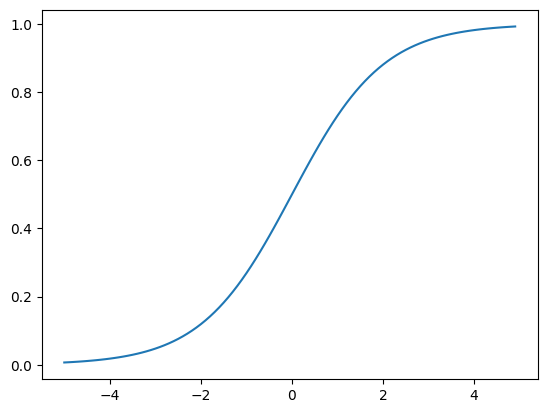

In [ ]:
#f(x) = 1 /1 + e^-x

import torch
import torch
import matplotlib.pyplot as plt

x = torch.arange(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

#**Tanh**

 The tanh activation function is a cosmetically different variant of the sigmoid. This becomes clear when you write down the expression for tanh:

 Example 3­3. Tanh activation

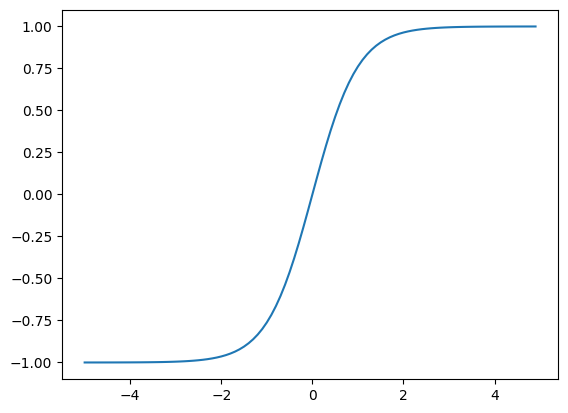

In [ ]:
import torch  # Import the torch library for tensor operations
import matplotlib.pyplot as plt  # Import the matplotlib library for plotting

x = torch.arange(-5., 5., 0.1)  # Create a tensor with values from -5 to 5 with a step of 0.1
y = torch.tanh(x)  # Apply the hyperbolic tangent function to each element of x
plt.plot(x.numpy(), y.numpy())  # Plot the x and y values
plt.show()  # Display the plot

#ReLU

ReLU (pronounced ray­luh) stands for rectified linear unit. This is arguably the most important of the activation functions. In fact, one could venture as far as to say that many of the recent innovations in deep learning would’ve been impossible without the use of ReLU. For something so fundamental, it’s also surprisingly new as far as neural network activation functions go.

Example 3­4. ReLU activation

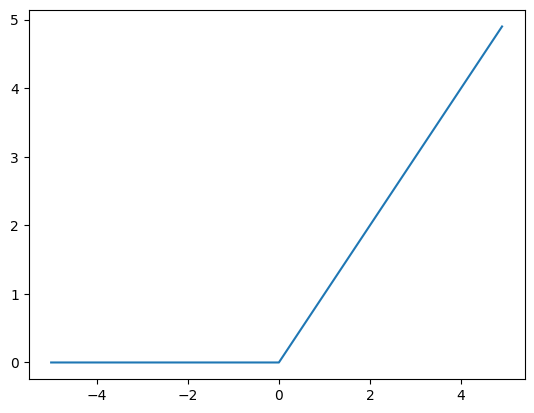

In [ ]:
import torch
import matplotlib.pyplot as plt


relu = torch.nn.ReLU()
x = torch.arange(-5., 5., 0.1)
y = relu(x)
plt.plot(x.numpy(), y.numpy())
plt.show()
plt.show()

The clipping effect of ReLU that helps with the vanishing gradient problem can also become an issue, f(x) = max(0,x) So, all a ReLU unit is doing is clipping the negative values to zero, as demonstrated in  xample 3­4.
where over time certain outputs in the network can simply become zero and never revive again. This is called the “dying ReLU” problem. To mitigate that effect, variants such as the Leaky ReLU and Parametric ReLU (PReLU) activation functions have proposed, where the leak coefficient a is a learned parameter.

f(x) = max(x,ax)

Example 3­5. PReLU activation

In [ ]:
import torch
import matplotlib.pyplot as plt

prelu = torch.nn.PReLU(num_parameters=1)
x = torch.arange(-5., 5., 0.1)
y = prelu(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

##Softmax

Another choice for the activation function is the softmax. Like the sigmoid function, the softmax function squashes the output of each unit to be between 0 and 1, as shown in  xample 3­6. However, the softmax operation also divides each output by the sum of all the outputs, which gives us a discrete probability distribution  over k possible classes:The probabilities in the resulting distribution all sum up to one. This is very useful for interpreting outputs for classification tasks, and so this transformation is usually paired with a probabilistic training objective, such as categorical cross entropy, which is covered in  Diving Deep into Supervised raining”.

Example 3­6. Softmax activation

In [ ]:
import torch.nn as nn
import torch

softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))



tensor([[ 0.6408, -2.2367,  0.0118]])
tensor([[0.6292, 0.0354, 0.3354]])
tensor([1.])


#**Loss Functions**

 In  chapter 1, we saw the general supervised machine learning architecture and how loss functions or objective functions help guide the training algorithm to pick the right parameters by looking at the data. Recall that a loss function takes a truth (y) and a prediction (ŷ) as an input and produces a real­ valued score. The higher this score, the worse the model’s prediction is. PyTorch implements more loss functions in its nn package than we can cover here, but we will review some of the most commonly used loss functions.
##Mean Squared Error Loss

 For regression problems for which the network’s output (ŷ) and the target (y) are continuous values, one common loss function is the mean squared error (MSE):The MSE is simply the average of the squares of the difference between the predicted and target values. There are several other loss functions that you can use for regression problems, such as mean absolute error (MAE) and root mean squared error (RMSE), but they all involve computing a real­ valued distance between the output and target.

 Example 3­7. MSE loss

In [ ]:
import torch
import torch.nn as nn

mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
print(loss)

tensor(1.0806, grad_fn=<MseLossBackward0>)


##Categorical Cross-Entropy Loss

The categorical cross­entropy loss is typically used in a multiclass classification setting in which the outputs are interpreted as predictions of class membership probabilities. The target (y) is a vector of n elements that represents the true multinomial distribution  over all the classes. If only one class is correct, this vector is a one­hot vector. The network’s output (ŷ) is also a vector of n elements but represents the network’s prediction of the multinomial distribution. Categorical cross entropy will compare these two vectors (y,ŷ) to measure the loss:Cross­entropy and the expression for it have origins in information theory, but for the purpose of this section it is helpful to consider this as a method to compute how different two distributions are. We want the probability of the correct class to be close to 1, whereas the other classes have a probability close to 0.

Example 3­8. Cross­entropy loss


In [ ]:
import torch
import torch.nn as nn

ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
print(loss)

tensor(0.8496, grad_fn=<NllLossBackward0>)


##Binary Cross-Entropy

 Loss The categorical cross­entropy loss function we saw in the previous section is very useful in classification problems when we have multiple classes. Sometimes, our task involves discriminating between two classes—also known as binary classification. For such situations, it is efficient to use the binary cross­entropy (BCE) loss. We look at this loss function in action in  Example: Classifying entiment of Restaurant Reviews”.
In  xample 3­9, we create a binary probability output vector, probabilities, using the sigmoid activation function on a random vector that represents the output of the network. Next, the ground truth is instantiated as a vector of 0’s and 1’s. Finally, we compute binary cross­entropy loss using the binary probability vector and the ground truth vector.

Example 3­9. Binary cross­entropy loss

In [ ]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
targets = torch.tensor([1, 0, 1, 0],  dtype=torch.float32).view(4, 1
                                                                oss = bce_loss(probabilities, targets))


# **Diving Deep into Supervised Training**